In [121]:
import strava_raw
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn')

In [167]:
activities = strava_raw.get_activities()
df = strava_raw.activities_to_df(activities)

run_df = df[df['type'] == 'Run']

date_distance_cols = [
    pd.to_datetime(run_df['start_date'].apply(lambda x: x.split("T")[0])), 
    run_df['distance'] * 0.000621371
]

run_df = pd.concat(date_distance_cols, axis=1)

In [168]:
dates = pd.date_range(run_df['start_date'].min(), run_df['start_date'].max())
dates_df = pd.DataFrame(dates)
dates_df.columns = ['start_date']
run_df = run_df.set_index('start_date').join(dates_df.set_index('start_date'), how='outer')

In [182]:
run_df['distance'] = run_df['distance'].apply(lambda x: 0 if np.isnan(x) else x)
run_df['distance_ma'] = run_df['distance'].rolling(30).sum()

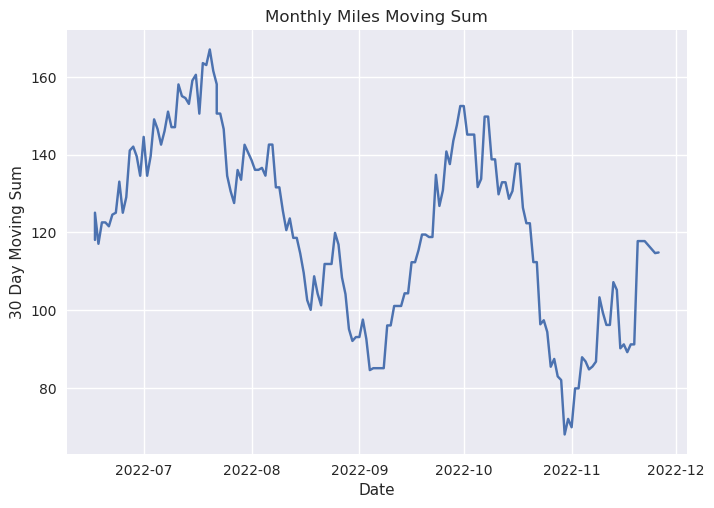

In [183]:
plt.plot(run_df.index, run_df['distance_ma'])
plt.title('Monthly Miles Moving Sum')
plt.xlabel('Date')
plt.ylabel('30 Day Moving Sum')
plt.show()